Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 1: Regresija

(c) 2015-2016 Jan Šnajder, Domagoj Alagić i Mladen Karan


<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 11. listopada 2016.</i> 

Objavljeno: **12. listopada 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **17. listopada 2016.**

### Upute

Prva laboratorijska vježba sastoji se od **sedam** zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [286]:
# Učitaj osnovne biblioteke...
import numpy as np
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Univarijatna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matrixom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [287]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
print X
print y

[[0]
 [1]
 [2]
 [4]]
[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje dizajn-matrice $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [288]:
# Vaš kôd ovdje...
from sklearn.preprocessing import PolynomialFeatures as PolyFeat

Phi = PolyFeat(1, False, True).fit_transform(X)
print Phi

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ dizajn-matrice, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [289]:
from numpy import linalg

In [290]:
# Vaš kôd ovdje...

print 'Izracun tezine w modela linearne regresije koristenjem dva izraza: '

# w = inv((Phi'*Phi))*Phi'*y
w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(Phi), Phi)), np.transpose(Phi)), y)
print 'w = inv((Phi\'Phi))Phi\'y = ', w

# Izracun pseudoinverza dizajn matrice
Phi_plus = np.dot(np.linalg.pinv(Phi), y)
print 'w = (Phi+)y', Phi_plus


Izracun tezine w modela linearne regresije koristenjem dva izraza: 
w = inv((Phi'Phi))Phi'y =  [ 2.2         0.45714286]
w = (Phi+)y [ 2.2         0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{x}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?


Pogreska ucenja E(h|D) =  2.04285714286


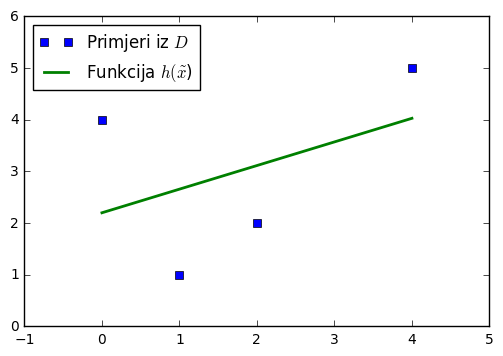

In [291]:
# Vaš kôd ovdje...
from sklearn.metrics import mean_squared_error as MSE

h = np.dot(Phi, w)
err = MSE(y, h)
print '\nPogreska ucenja E(h|D) = ', err

plt.plot(X, y, 's', X, h, linewidth = 2)
plt.legend(['Primjeri iz $D$', 'Funkcija $h(\~{x}$)'], loc='upper left')
plt.axis([-1, 5, 0, 6]);

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [292]:
# Vaš kôd ovdje...

try:
    np.dot(np.linalg.inv(Phi), y)
except:
    print '\nTezinu w nije moguce pronaci na ovaj nacin, potreban je pseudoinverz!'


Tezinu w nije moguce pronaci na ovaj nacin, potreban je pseudoinverz!


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [293]:
from sklearn.linear_model import LinearRegression

In [294]:
# Vaš kôd ovdje...
LinReg = LinearRegression().fit(Phi, y)

w = [LinReg.intercept_, LinReg.coef_[1]]
h = LinReg.predict(Phi)

err2 = MSE(y, h)
print 'Prethodno izracunata pogreska ucenja E(h|D) = ', err
print 'Novo izracunata pogreska ucenja E(h|D) = ', err2

print '\nTezine w = ', w
print 'Predikcija modela h = ', h

Prethodno izracunata pogreska ucenja E(h|D) =  2.04285714286
Novo izracunata pogreska ucenja E(h|D) =  2.04285714286

Tezine w =  [2.2000000000000002, 0.45714285714285713]
Predikcija modela h =  [ 2.2         2.65714286  3.11428571  4.02857143]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [295]:
from numpy.random import normal

In [296]:
f = lambda x: (5 + x - 2*(x**2) - 5*(x**3));

def make_labels (X, f, noise=0):
    
    return f(X) + normal(0, noise, size(X))

N = 50; sigma = 200;

# Vaš kôd ovdje...
x = linspace(-5, 5, N);

y_i = make_labels(x, f, sigma)

y6a = y_i; x6a = x;


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

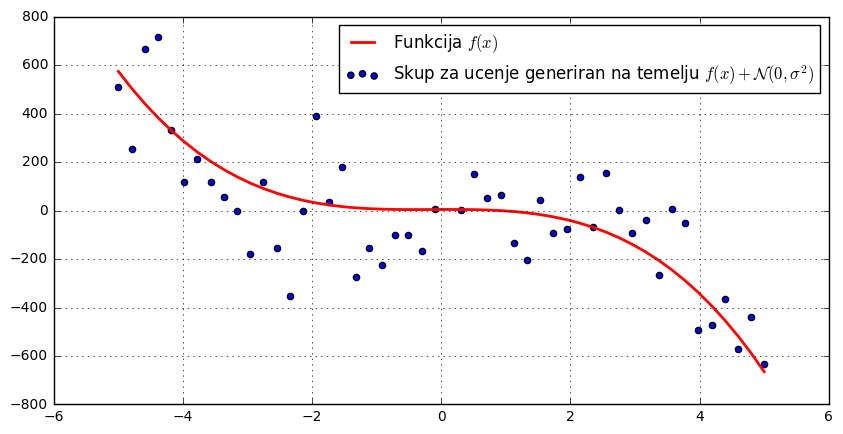

In [297]:
# Vaš kôd ovdje...
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(x, f(x), 'r', linewidth = 2, label = 'Funkcija $f(x)$')
plt.scatter(x, y_i, label = 'Skup za ucenje generiran na temelju $f(x) + \mathcal{N}(0,\sigma^2)$');
plt.legend(loc = 'upper right');

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.


Pogreska ucenja modela E(h|D) =  29865.2415698 



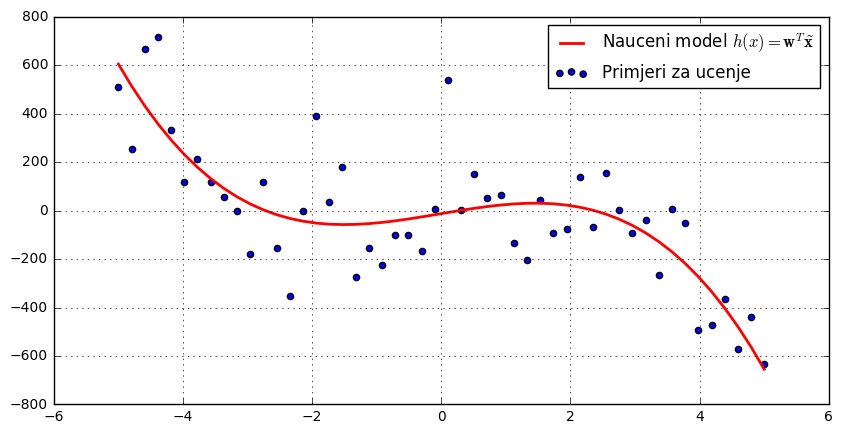

In [298]:
# Vaš kôd ovdje...

from sklearn.preprocessing import PolynomialFeatures as PolyFeat

Phi_d3 = PolyFeat(3).fit_transform(x.reshape(-1,1))
w_d3 = np.dot(np.linalg.pinv(Phi_d3), y_i)
h_d3 = np.dot(Phi_d3, w_d3)

err_d3 = MSE(y_i, h_d3)
print '\nPogreska ucenja modela E(h|D) = ', err_d3, '\n'

plt.figure(figsize=(10,5));
plt.grid();
plt.scatter(x, y_i, label = 'Primjeri za ucenje');
plt.plot(x, h_d3, 'r', linewidth = 2, label = 'Nauceni model $h(x) = \mathbf{w}^T\~{\mathbf{x}}$');
#plt.plot(x, f(x), 'g', label = 'Funkcija $f(x)$')
plt.legend(loc = 'upper right');

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?


E(h|D): 


Pogreska ucenja modela uz d = 1 ->  48604.6190756

Pogreska ucenja modela uz d = 3 ->  29865.2415698

Pogreska ucenja modela uz d = 5 ->  29712.9880453

Pogreska ucenja modela uz d = 10 ->  27079.7430866

Pogreska ucenja modela uz d = 20 ->  15331.1931836




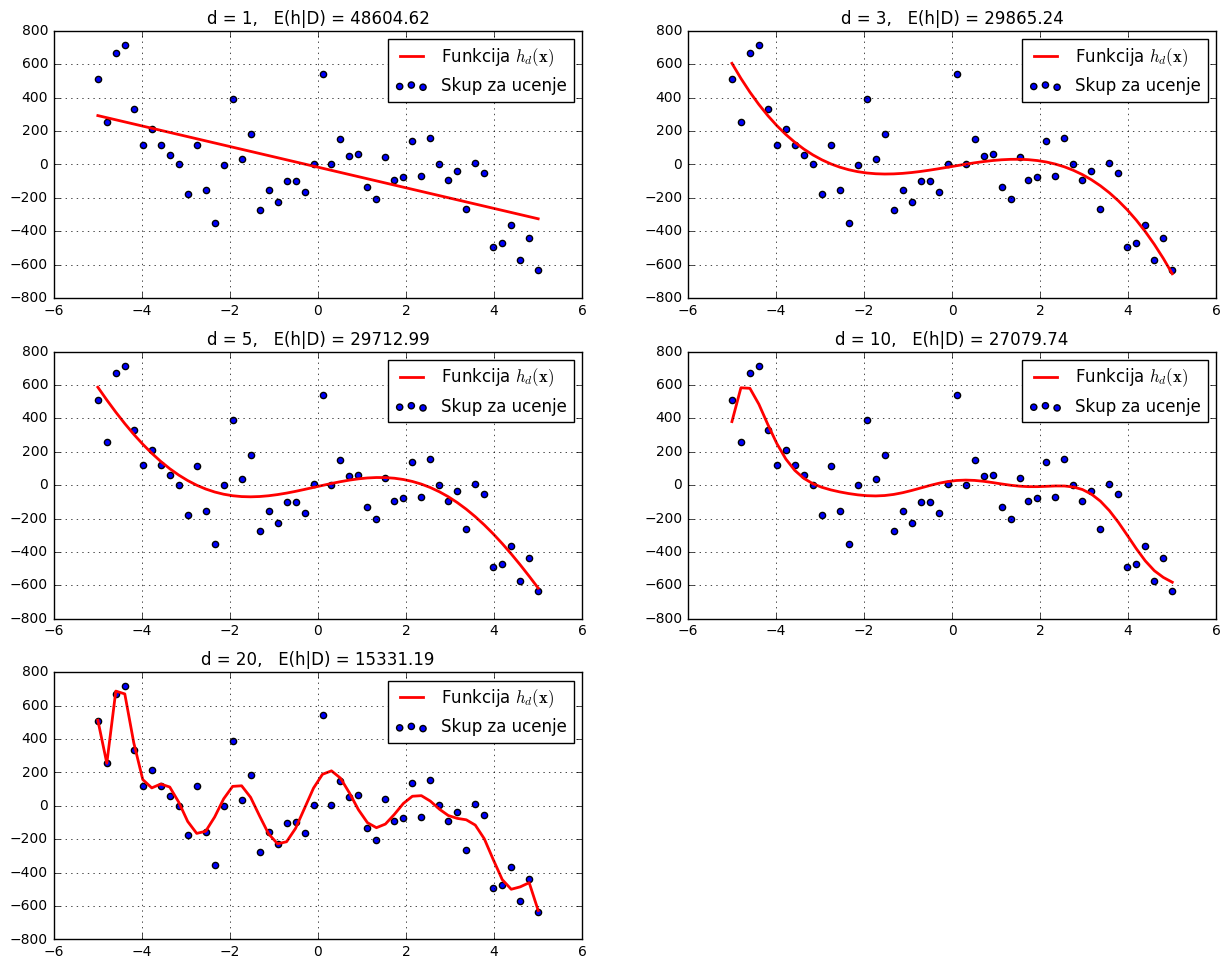

In [299]:
# Vaš kôd ovdje...

Phi_d = []; 
w_d = []; 
h_d = [];
err_d = [];

d = [1, 3, 5, 10, 20]

for i in d:
    Phi_d.append(PolyFeat(i).fit_transform(x.reshape(-1,1)))
    
for i in range(0, len(d)):
    w_d.insert(i, np.dot(np.linalg.pinv(Phi_d[i]), y_i))
    h_d.insert(i, np.dot(Phi_d[i], w_d[i]))
    
print '\nE(h|D): \n'

for i in range(0, len(d)):
    err_d.insert(i, MSE(y_i, h_d[i]))
    print '\nPogreska ucenja modela uz d = %d -> ' % d[i], err_d[i]

print '\n'

fig = plt.figure(figsize=(15, 20))
fig.subplots_adjust(wspace=0.2) 

for i in range(0, len(d)):
    
    ax = fig.add_subplot(5, 2, i+1)
    ax.scatter(x, y_i, label = 'Skup za ucenje');
    ax.plot(x, h_d[i], 'r', linewidth = 2, label = 'Funkcija $h_d(\mathbf{x})$');  
    ax.legend(loc = 'best', prop={'size':12});
    plt.title('d = %d,   E(h|D) = %.2f' % (d[i], err_d[i]) )
    ax.grid(); 
                   

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in\{1,20\}$. Radi preciznosti, funkcije $h(\mathbf{x})$ iscrtajte na cijelom skupu primjera (ali pogrešku generalizacije računajte, naravno, samo na ispitnome skupu). Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [300]:
from sklearn import cross_validation

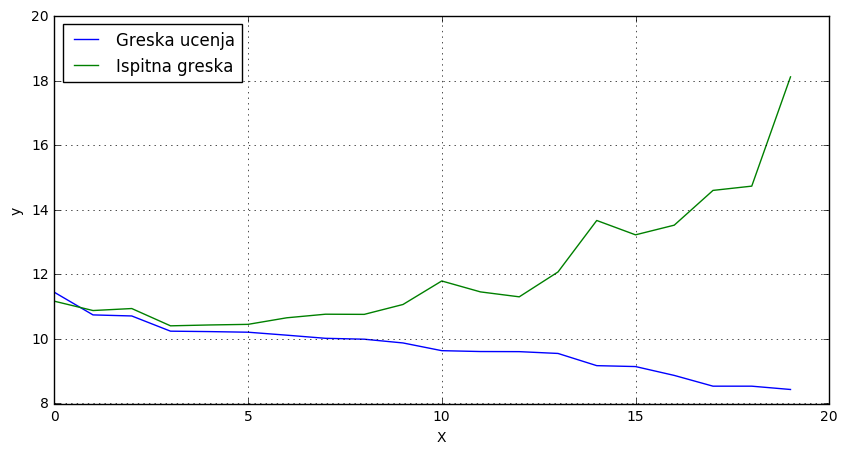

In [301]:
# Vaš kôd ovdje...
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y_i, test_size = 0.5)
err_train = [];
err_test = [];
d = range(0, 20)

for i in d:
    Phi_train = PolyFeat(i).fit_transform(X_train.reshape(-1, 1))
    Phi_test = PolyFeat(i).fit_transform(X_test.reshape(-1, 1))
    w_train = np.dot(np.linalg.pinv(Phi_train), y_train)
    h_train = np.dot(Phi_train, w_train)
    h_test = np.dot(Phi_test, w_train)
    
    err_train.insert(i, np.log(MSE(y_train, h_train)))
    err_test.insert(i, np.log(MSE(y_test, h_test)))

plt.figure(figsize=(10,5))
plt.plot(d, err_train, d, err_test);
plt.grid(), plt.xlabel('X'), plt.ylabel('y');
plt.legend(['Greska ucenja', 'Ispitna greska'], loc='best');
                

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za sve kombinacija broja primjera $N\in\{100,200,1000\}$ i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

***Q:*** Jesu li rezultati očekivani? Obrazložite.

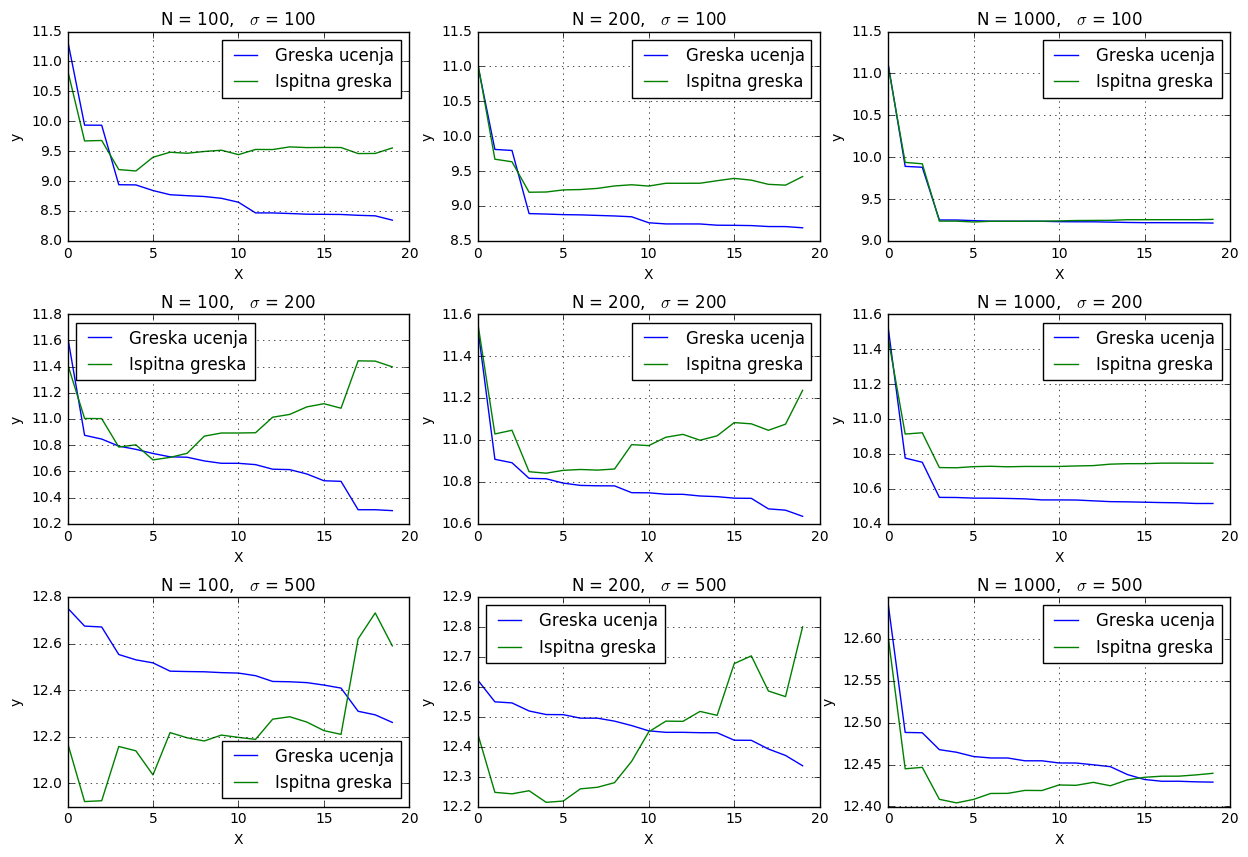

In [302]:
# Vaš kôd ovdje...

N2 = [100, 200, 1000];
sigma = [100, 200, 500];

X_train4c_temp = [];
X_test4c_temp = [];
y_train4c_temp = [];
y_test4c_temp = [];

x_tmp = np.linspace(-5, 5, 1000);
X_train, X_test = cross_validation.train_test_split(x_tmp, test_size = 0.5)

for i in range(0, 3):
    
    y_tmp_train = make_labels(X_train, f, sigma[i])
    y_tmp_test = make_labels(X_test, f, sigma[i]) 
    for j in range(0,3):   
        X_train4c_temp.append(X_train[0:N2[j]/2])
        X_test4c_temp.append(X_test[0:N2[j]/2])
        y_train4c_temp.append(y_tmp_train[0:N2[j]/2])
        y_test4c_temp.append(y_tmp_test[0:N2[j]/2])

    
err_tr = [];
err_tst = [];

for i in range(0, 9):
    X_train4c = X_train4c_temp[i]
    X_test4c = X_test4c_temp[i]
    y_train4c = y_train4c_temp[i]
    y_test4c = y_test4c_temp[i]
    
    err_train4c = [];
    err_test4c = [];
    d4c = range(0, 20)

    for j in d4c:
        Phi_train4c = PolyFeat(j).fit_transform(X_train4c.reshape(-1, 1))
        Phi_test4c = PolyFeat(j).fit_transform(X_test4c.reshape(-1, 1))
        w_train4c = np.dot(np.linalg.pinv(Phi_train4c), y_train4c)
        h_train4c = np.dot(Phi_train4c, w_train4c)
        h_test4c = np.dot(Phi_test4c, w_train4c)
        err_train4c.insert(j, np.log(MSE(y_train4c, h_train4c)))
        err_test4c.insert(j, np.log(MSE(y_test4c, h_test4c)))
        
    err_tr.append(err_train4c);
    err_tst.append(err_test4c);
    
    
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(wspace=0.2, hspace = 0.35) 

Nn = [100, 200, 1000, 100, 200, 1000, 100, 200, 1000]
sgm = [100, 100, 100, 200, 200, 200, 500, 500, 500]

for i in range(0, 9):    
    ax = fig.add_subplot(3, 3, i+1)
    plt.plot(d, err_tr[i], d, err_tst[i]); grid;
    plt.xlabel('X'), plt.ylabel('y');
    plt.legend(['Greska ucenja', 'Ispitna greska'], loc='best', prop={'size':12});
    plt.title('N = %d,   $\sigma$ = %d' % (Nn[i], sgm[i]) )
    ax.grid();


### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [303]:
# Vaš kôd ovdje...
lam = [0, 1, 10]

Phi3d = PolyFeat(3).fit_transform(X)
w_L2 = [];

w_reg = lambda lam: np.dot(np.dot(np.linalg.inv(np.dot(Phi3d.T, Phi3d) + np.dot(lam, np.eye(4))), Phi3d.T), y);

for i in range(0, 3):
    w_L2.insert(i, w_reg(lam[i]))
    print w_L2[i]


[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[ 0.43312265  0.11060671  0.13827839  0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [304]:
from sklearn.linear_model import Ridge

In [305]:
# Vaš kôd ovdje...

for i in lam:
    w_foo = [];
    w_L22 = Ridge(alpha = i).fit(Phi3d, y)
    
    w_foo.append(w_L22.intercept_)
    for i in range(0, len(w_L22.coef_[1:])):
        w_foo.append(w_L22.coef_[i])
    
    print w_foo

[4.0000000000000284, 0.0, -5.9166666666667318, 3.3750000000000271]
[3.0569614512471643, 0.0, -0.69079365079365218, -0.28317460317460036]
[2.4944418431229733, 0.0, -0.15897294873414747, -0.13423066536848341]


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

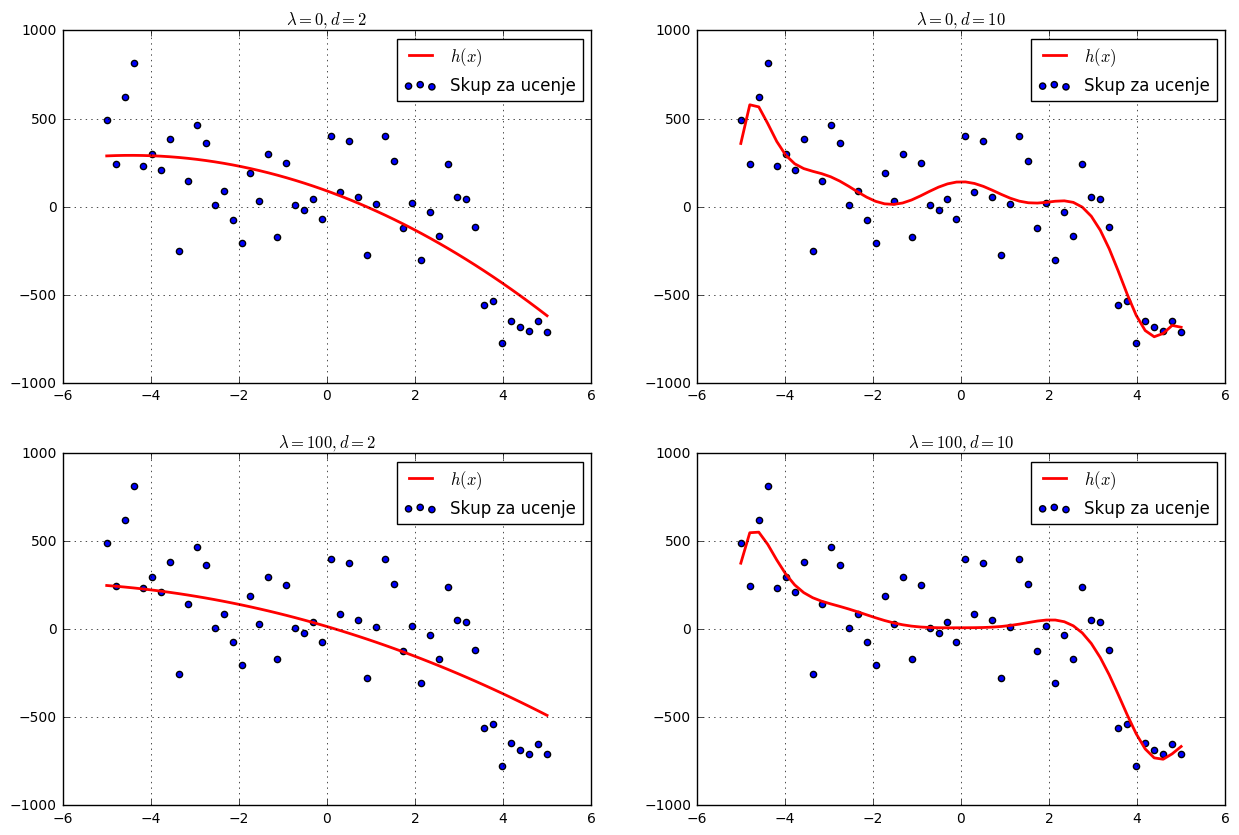

In [306]:
# Vaš kôd ovdje...
x5a = linspace(-5, 5, 50);
f = (5 + x5a - 2*(x5a**2) - 5*(x5a**3));
y5a = f + normal(0, 200, 50);

lamd = [0, 100]
dd = [2, 10]
h5a = []

for i in lamd:
    for j in dd:
        Phi5a = PolyFeat(j).fit_transform(x5a.reshape(-1,1))
        w_5a = np.dot(np.dot(np.linalg.inv(np.dot(Phi5a.T, Phi5a) + np.dot(i, np.eye(j+1))), Phi5a.T), y5a);
        h_5a = np.dot(Phi5a, w_5a)
        h5a.append(h_5a)
       

lamdd = [0, 0, 100, 100]
ddd = [2, 10, 2, 10]

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(wspace=0.2, hspace = 0.2) 

for i in range(0, len(lamdd)):    
    ax = fig.add_subplot(2, 2, i+1)
    plt.plot(x5a, h5a[i], 'r', linewidth = 2);
    plt.scatter(x5a, y5a); grid();
    plt.legend(['$h(x)$', 'Skup za ucenje'], loc='best', prop={'size':12});
    plt.title('$\lambda = %d,   d = %d $' % (lamdd[i], ddd[i]) )

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=20,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti a kojoj podnaučenosti. Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


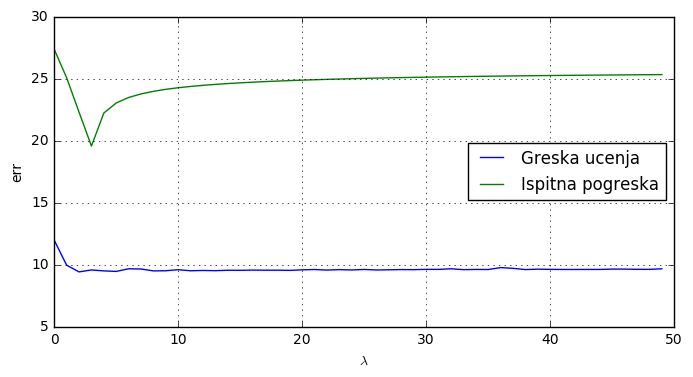

In [307]:
# Vaš kôd ovdje...
X5a_train, X5a_test, y5a_train, y5a_test = cross_validation.train_test_split(x5a, y5a, test_size = 0.5)
err5a_train = [];
err5a_test = [];
d = 20;
lambda5a = range(0, 50)

for i in lambda5a:
    Phi5a_train = PolyFeat(d).fit_transform(X5a_train.reshape(-1, 1))
    Phi5a_test = PolyFeat(d).fit_transform(X5a_test.reshape(-1, 1))
    w5a_train = np.dot(np.dot(np.linalg.inv(np.dot(Phi5a_train.T, Phi5a_train) + np.dot(i, np.eye(d+1))), Phi5a_train.T), y5a_train);
    h5a_train = np.dot(Phi5a_train, w5a_train)
    h5a_test = np.dot(Phi5a_test, w5a_train)
    
    err5a_train.insert(i, np.log(MSE(y5a_train, h5a_train)))
    err5a_test.insert(i, np.log(MSE(y5a_test, h5a_test)))

plt.figure(figsize=(8,4))
plt.plot(lambda5a, err5a_train, lambda5a, err5a_test);
plt.grid(), plt.xlabel('$\lambda$'), plt.ylabel('err');
plt.legend(['Greska ucenja', 'Ispitna pogreska'], loc='best');

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije:

In [308]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[sp.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=20$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

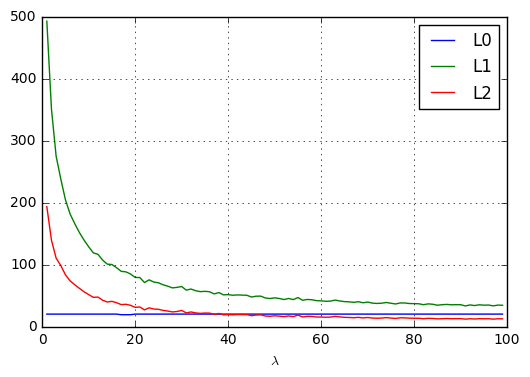

In [309]:
# Vaš kôd ovdje...
lambda6a = range(1,100)
d6a = 20
X6a_train, X6a_test, y6a_train, y6a_test = cross_validation.train_test_split(x6a, y6a, test_size = 0.5)
Phi6a_train = PolyFeat(d6a).fit_transform(X6a_train.reshape(-1,1))

L0 = [];
L1 = [];
L2 = [];

L1_norm = lambda w: sum(abs(w));
L2_norm = lambda w: math.sqrt(np.dot(w.T, w));

for i in lambda6a:
    w6a = np.dot(np.dot(np.linalg.inv(np.dot(Phi6a_train.T, Phi6a_train) + np.dot(i, np.eye(d6a+1))), Phi6a_train.T), y6a_train);
    
    L0.append(nonzeroes(w6a))
    L1.append(L1_norm(w6a))
    L2.append(L2_norm(w6a))
    
plot(lambda6a, L0, lambda6a, L1, lambda6a, L2, linewidth = 1);
legend(['L0', 'L1', 'L2'], loc = 'best'); grid(); xlabel('$\lambda$');

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

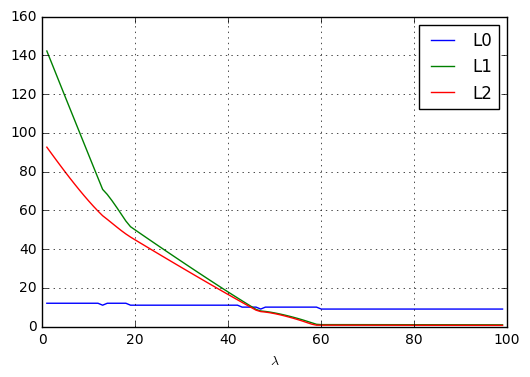

In [310]:
# Vaš kôd ovdje...
from sklearn.linear_model import Lasso

L0 = [];
L1 = [];
L2 = [];

for i in lambda6a:
    lass = Lasso(alpha = i).fit(Phi6a_train, y6a_train)
    w6b = lass.coef_
    
    L0.append(nonzeroes(w6b))
    L1.append(L1_norm(w6b))
    L2.append(L2_norm(w6b))
    
plot(lambda6a, L0, lambda6a, L1, lambda6a, L2, linewidth = 1);
legend(['L0', 'L1', 'L2'], loc = 'best'); grid(); xlabel('$\lambda$');


### 7. Predviđanje cijena nekretnina u Bostonu

Do sada smo razmatrali isključivo univarijatnu regresiju, tj. imali smo samo jednu značajku ($n=1$). U većini stvarnih problema baratamo s većim brojem značajki. Razmotrimo sada jedan nešto realniji problem, kod kojega postoji više značajki, pa je potrebno napraviti multivarijatnu regresiju.

Učitajte skup podataka *Boston House Prices*:

In [311]:
from sklearn.datasets import load_boston
boston = load_boston()
print boston.data.shape
print boston.target.shape

(506, 13)
(506,)


Skup sadrži 506 primjera sa 13 numeričkih značajki. Opis skupa možete dobiti na sljedeći način:

In [312]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### (a)

Vaš je zadatak da izgradite regresijski model za predviđanje cijene nekretnine (`y=boston.target`) na temelju 13 raspoloživih značajki za svaku nekretninu (`X=boston.data`). Cilj je pronaći najbolji mogući linearni model regresije na ovom skupu podataka i provjeriti njegovu točnost u smislu pogreške kvadratnog odstupanja ([`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)). 

Hiperparametri modela koje treba isprobati su:

* **Regularizacija:** Bez regularizacije ([`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)), L2-regularizacija ([`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)) i L1-regularizacija ([`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso));
* **Značajke:** Izvornih 13 značajki, polinomijalne značajke (isprobajte različite stupnjeve polinoma $d$), samo interakcijske značajke (opcija `interaction_only` u klasi [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html));

Kao i inače, za odabir i ispitivanje modela koristit ćemo **unakrsnu provjeru** (engl. *cross-validation*). Skup primjera za učenje podijelit ćemo na **skup za učenje**, **skup za provjeru** i **skup za ispitivanje** u omjeru (otprilike) 3:1:1. Kao u uvijek, model trebate trenirati na skupu za učenje, odabir modela (odnosno optimizaciju hiperparametra) trebate provesti na skupu za provjeru, a konačno vrednovanje modela trebate načiniti na skupu za ispitivanje. Konačno vrednovanje radite samo jednom, za model koji ste na skupu za provjeru odabrali kao optimalan.

**NB:** Nakon što odaberete optimalan model na skupu za provjeru, prije konačnog ispitivanja odabrani model ponovno trenirajte na uniji skupova za učenje i provjeru. Na taj način iskorištavate maksimalno iskorištavate dostupne podatke i model će u pravilu biti bolji.

Podjela na skup za učenje, provjeru i ispitivanje u ovom je slučaju fiksna kako bi svi imali identične skupove i kako bi rezultati bili usporedivi. (U stvarnosti biste ovakav eksperiment radili malo drugačije: koristili biste višestruku unakrsnu provjeru ili ugnježđenu unakrsnu provjeru. Više o tome u budućim vježbama.) 

Koristite sljedeće skupove:

In [313]:
from sklearn import cross_validation
X_train, X_rest, y_train, y_rest = cross_validation.train_test_split(boston.data,boston.target,train_size=0.6,random_state=42)
X_validate, X_test, y_validate, y_test = cross_validation.train_test_split(X_rest,y_rest,test_size=0.5,random_state=42)
print X_train.shape, X_validate.shape ,X_test.shape

(303, 13) (101, 13) (102, 13)


Tocnost optimalnog regresijskog modela -> E(h|D) =  14.4581605007


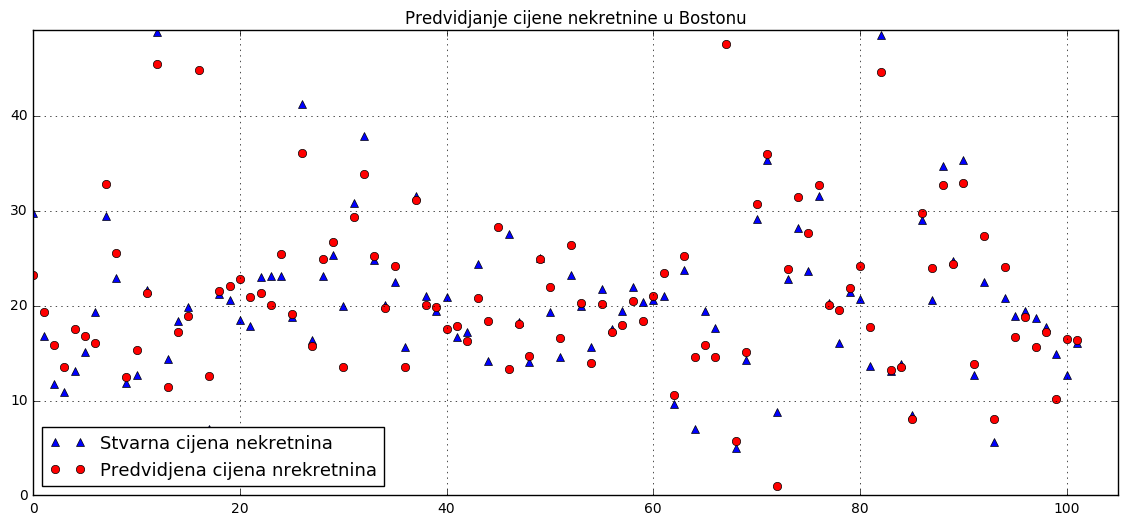

In [314]:
# Vaše rješenje...

# Prvo je potrebno provesti optimizaciju hiperparametara
d7a = range(1, 3)
lambda7a = range(1, 50)
lam_array = []; d_array = []; inter_array = []; err_array = [];

for i in lambda7a:
    
    for j in d7a:
        
        # Interaction_only = False
        Phi7a_train_fls = PolyFeat(j).fit_transform(X_train)
        Phi7a_valid_fls = PolyFeat(j).fit_transform(X_validate)
        
        #Interaction_only = True
        Phi7a_train_tr = PolyFeat(j, interaction_only = True).fit_transform(X_train)
        Phi7a_valid_tr = PolyFeat(j, interaction_only = True).fit_transform(X_validate)
    
        Phi7a_tr = [Phi7a_train_fls, Phi7a_train_tr]
        Phi7a_val = [Phi7a_valid_fls, Phi7a_valid_tr]
        
        for k in range(0,2):
            
            # Bez regularizacije (LinearRegression)
            LinReg7a = LinearRegression().fit(Phi7a_tr[k], y_train)
            w_LinReg = [LinReg7a.intercept_]
            w_LinReg.extend(LinReg7a.coef_[1:])

            h_LinReg = np.dot(Phi7a_val[k], w_LinReg)
            err_LinReg = MSE(y_validate, h_LinReg)
            err_array.append(err_LinReg), inter_array.append(k), lam_array.append(i), d_array.append(j)
            
            # L2 regularizacija
            w7a_L22 = Ridge(alpha = i).fit(Phi7a_tr[k], y_train)
            w_L2 = [w7a_L22.intercept_]
            w_L2.extend(w7a_L22.coef_[1:])
            
            h_L2 = np.dot(Phi7a_val[k], w_L2)
            err_L2 = MSE(y_validate, h_L2)
            err_array.append(err_L2), inter_array.append(k), lam_array.append(i), d_array.append(j)
            
            # L1 regularizacija
            lass7a = Lasso(alpha = i).fit(Phi7a_tr[k], y_train)
            w_L1 = [lass7a.intercept_]
            w_L1.extend(lass7a.coef_[1:])
                
            h_L1 = np.dot(Phi7a_val[k], w_L1)
            err_L1 = MSE(y_validate, h_L1)
            err_array.append(err_L1), inter_array.append(k), lam_array.append(i), d_array.append(j)
            
# Trazenje optimalnih parametara
err_min = np.amin(err_array); min_id = err_array.index(err_min); d_min = d_array[min_id]; lambda_min = lam_array[min_id]; 

k_min = inter_array[min_id]
if k_min == 0:
    interaction_only_min = False
else:
    interaction_only_min= True

# Ponovno treniranje modela na uniji skupa za ucenje i skupa za validaciju
# koristeci gore pronadjene optimalne parametre
X_union = []; X_union.extend(X_train); X_union.extend(X_validate);
y_union = []; y_union.extend(y_train); y_union.extend(y_validate);

Phi_union = PolyFeat(d_min, interaction_only = interaction_only_min).fit_transform(X_union)
Phi7a_test = PolyFeat(d_min, interaction_only = interaction_only_min).fit_transform(X_test)

if min_id % 3 == 0: # Linearna Regresija
    LinReg_opt = LinearRegression().fit(Phi_union, y_union)
    w_opt = [LinReg_opt.intercept_]
    w_opt.extend(LinReg_opt.coef_[1:])

elif min_id % 3 == 1: # L2 regularizacija
    w7a_L2_opt = Ridge(alpha = lambda_min).fit(Phi_union, y_union)
    w_opt = [w7a_L2_opt.intercept_]        
    w_opt.extend(w7a_L2_opt.coef_[1:])
    
else: # L1 regularizacija
    lass_opt = Lasso(alpha = lambda_min).fit(Phi_union, y_union)
    w_opt = [lass_opt.intercept_]
    w_opt.extend(lass_opt.coef_[1:])
    
h_opt = np.dot(Phi7a_test, w_opt)
err_opt = MSE(y_test, h_opt)

print 'Tocnost optimalnog regresijskog modela -> E(h|D) = ', err_opt


figure(figsize=(14,6));
plot(y_test, '^', h_opt, 'ro', linewidth = 20); axis([0, 105, 0, len(lambda7a)]); grid()
legend(['Stvarna cijena nekretnina', 'Predvidjena cijena nrekretnina'], loc='best', prop={'size':13});
title('Predvidjanje cijene nekretnine u Bostonu');
            

**Q:** Koliko značajki ima svaki od modela koji ste isprobali?

**Q:** Provjerite točnost odabranog modela na (1) skupu za učenje, (2) skupu za provjeru, (3) uniji ta dva skupa i (4) skupu za ispitivanje. Jesu li odnosi između točnosti modela na ova četiri skupa očekivana? Obrazložite.

**Q:** Kod treniranja regresijskog modela moguće je postaviti `fit_intercept=False`, čime se izbjegava optimiranje težine $w_0$. Trenirajte odabrani model s tom postavkom. Usporedite s točnošću optimalnog modela. Je li rezultat očekivan? Obrazložite. Ima li predobrada značajki ikakvog utjecaja na ovu razliku?